# 基于CNN模型的物体识别

## 0.先完成理论部分即可

## 1.复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

## 2.回答以下理论题目?

### 2.1. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

2.1。假设你的输入是一个100 * 100的灰度图像，你使用一个卷积层，有50个过滤器，每个过滤器都是5x5。这个隐含层有多少个参数(包括偏置参数)?

参数和输入的图片大小是没有关系的，无论你给的图像像素有多大，参数值都是不变的，在这个题中，参数值只与过滤器有关。我们来看一下怎么算：单片过滤器的大小是5∗5，由于输入的是灰度图像，所以信道nc=1，由此可见，一个完整的过滤器的组成是：5∗5∗1，每一个完整的过滤器只有一个偏置参数b，所以，每一个完整的过滤器拥有5∗5∗1+1=26个参数，而此题中使用了50个过滤器，所以这个隐藏层包含了26∗50=1300个参数。(网络参考)

### 2.2. What are "local invariant" and "parameter sharing" ?

 "local invariant"(局部不变性) and "parameter sharing(权值共享)" 最终目的是减少参数数量，使运算变得高效，简洁，在超大数据上
 能够运行

local invariant(局部不变性):局部不变性的概念允许我们将分类一副图像看作是包含特定目标的过程，而不管图像中该目标出现在什么地方。我们通过“pooling layer”的使用来获得这种局部不变性，pooling层用对特定过滤器的高响应来标识输入卷（input volume）的区域

而且不用局部连接，那就是全连接网络，就是每个元素与隐藏神经原进行全连接，这样参数变量为W*H*N，像素矩阵很大，会选择较多的隐藏元个数，
这时单个隐藏层个数非常多，不容易计算。

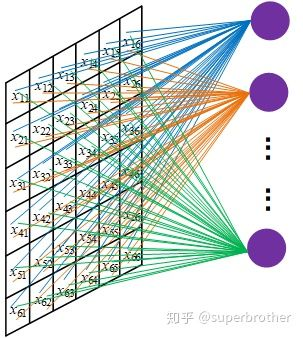

parameter sharing(权值共享):给定一个图像，用一个filter去扫描图片，filter里面的数叫做权重，这张图的每个位置被同样的filter扫描，
所以权重是一样的，这就叫共享。
不进行parameter sharing的样子如下图
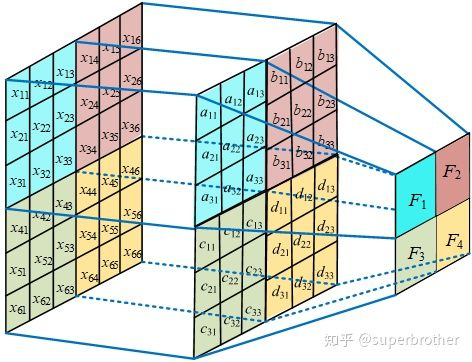


比如特征图由10个32*32*1的特征图组成，即每个特征图上有1024个神经元，每个神经元对应输入图像上一块5*5*3的区域，即一个神经元和输入图像的这块区域有75个连接，即75个权值参数，则共有75*1024*10=768000个权值参数，这是非常复杂的

#### parameter sharing的样子如下图

<img src="https://img-blog.csdnimg.cn/20200303120452928.gif" alt="图片替换文本" width="500" height="600" align="bottom" />

因此卷积神经网络引入“权值”共享原则，即一个特征图上每个神经元对应的75个权值参数被每个神经元共享，这样则只需75*10=750个权值参数，而每个特征图的阈值也共享，即需要10个阈值（bias偏置），则总共需要750+10=760个参数。

### 2.3. Why we use batch normalization ?

##### 使各层的激活值分布有适当的广度，从而顺利地进行学习，强制性调整激活值的分布。
##### 优点：1.使学习快速的进行，增大学习率
#####     2.不依赖初始值
#####     3.抑制过拟合(降低Dropout等的必要性)
#####     4.解决了梯度消失的问题(梯度消失：前面隐藏曾的学习速率低于后面的学习速率，随着层数增加，分类准确率反而下降)

### 2.4. What problem does dropout try to solve ?

使解决过拟合问题，是神经网络常用正则化方法之一，对某一层使用 dropout，就是在训练过程中随机将该层的一些输出特征舍
弃（设置为 0）

Dropout是一种在学习的过程中随机删除神经元的方法。训练时，随机
选出隐藏层的神经元，然后将其删除。被删除的神经元不再进行信号的传递，
如图所示。训练时，每传递一次数据，就会随机选择要删除的神经元。
然后，测试时，虽然会传递所有的神经元信号，但是对于各个神经元的输出，
要乘上训练时的删除比例后再输出。
<center>
<img style="zoom:70%;"
src="dropout.jpg">
<br>
<div style="color:black; "> </div>
</center>

## 3. 实践题

### 3.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

Load the dataset. 

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

  1400832/170498071 [..............................] - ETA: 2:15:46

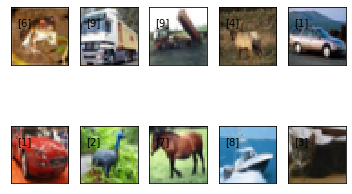

In [3]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1])
    plt.text(3,10,str(y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

##### It is your time to build your model. Try your best to build a model with good performance on the test set.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import DataLoader
import torchvision

In [11]:
#超参数定义
EPOCH = 30
BATCH_SIZE = 64
lR = 0.001
#数据加载
train_data = datasets.CIFAR10(root='/home/ma-user/work',train = True,
                              transform = transforms.ToTensor(),download = False)
test_data = datasets.CIFAR10(root='/home/ma-user/work',train = False,
                            transform = transforms.ToTensor(),download = False)

In [12]:
#输出图像
temp = train_data[1][0].numpy()
print(temp.shape)

(3, 32, 32)


In [13]:
temp = temp.transpose(1,2,0)
print(temp.shape)

(32, 32, 3)


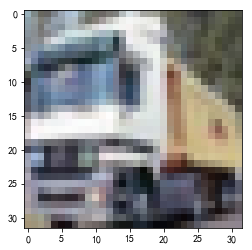

In [14]:
plt.imshow(temp)
plt.show()

In [15]:
#使用Dataloader进行数据分批
trian_load  = DataLoader(dataset = train_data,batch_size = BATCH_SIZE,shuffle = True)
#使用ResNet50
test_load = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=True)
model = torchvision.models.resnet50(pretrained=False)

In [16]:
#损失函数
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = lR)

#设置GPU
device = torch.device('cuda:0'if torch.cuda.is_available()else 'cpu')
#模型和数据都需要devive
model = model.to(device)

In [17]:
#训练过程
for epoch in range(EPOCH):
    for i,data in enumerate(trian_load):
        inputs,labels = data
        inputs,labels = inputs.to(device),labels.to(device)
        #前向传播
        outputs = model(inputs)
        #计算损失函数
        loss = criterion(outputs,labels)
        #清空上一次梯度
        optimizer.zero_grad()
        #反向传播
        loss.backward()
        #参数更新
        optimizer.step()
    print('epoch{} loss:{:.4f}'.format(epoch+1,loss.item()))
#参数模型保存s
torch.save(model,'cifar10_resnet.pt')
print('cifar10_resnet.pt saved')

epoch1 loss:1.4850
epoch2 loss:1.1253
epoch3 loss:1.3186
epoch4 loss:0.9426
epoch5 loss:1.9723
epoch6 loss:1.6387
epoch7 loss:0.9701
epoch8 loss:0.8066
epoch9 loss:0.4862
epoch10 loss:0.8733
epoch11 loss:0.3763
epoch12 loss:0.9479
epoch13 loss:2.2422
epoch14 loss:1.2046
epoch15 loss:1.7858
epoch16 loss:0.4954
epoch17 loss:0.3397
epoch18 loss:0.9454
epoch19 loss:1.8073
epoch20 loss:0.4057
epoch21 loss:0.4513
epoch22 loss:0.0521
epoch23 loss:0.5674
epoch24 loss:0.0834
epoch25 loss:0.2360
epoch26 loss:0.6970
epoch27 loss:0.2022
epoch28 loss:0.3812
epoch29 loss:0.8896
epoch30 loss:0.0608
cifar10_resnet.pt saved


/home/ma-user/anaconda3/envs/Pytorch-1.0.0/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ResNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/ma-user/anaconda3/envs/Pytorch-1.0.0/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/ma-user/anaconda3/envs/Pytorch-1.0.0/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BatchNorm2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/ma-user/anaconda3/envs/Pytorch-1.0.0/lib/python3.6/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It 

In [18]:
#模型加载
model = torch.load('cifar10_resnet.pt')
#测试
model.eval()#固定模型参数
correct,total = 0, 0
for data in test_load:
    inputs,labels = data
    inputs,labels = inputs.to(device),labels.to(device)
    #前向传播
    outputs = model(inputs)
    _,predicted = torch.max(outputs.data,1)
    total = total + labels.size(0)
    correct = correct + (predicted==labels).sum().item()
    
#输出准确率
print('测试图像10000张的准确率:{:,.4f}%'.format(100.0*correct/total))

测试图像10000张的准确率:74.9500%


###  Congratulations! You hanve finished the assignment 3.   

In [17]:
!pip install torch==1.3.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [18]:
!pip install torch==1.3.1

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [14]:
!pip install torchvision==0.4.1

    100% |████████████████████████████████| 10.1MB 93.0MB/s ta 0:00:011 5% |█▊                              | 532kB 77.8MB/s eta 0:00:01MB 89.8MB/s eta 0:00:01███████████████▎ | 9.6MB 87.7MB/s eta 0:00:01


    98% |███████████████████████████████▍| 758.6MB 94.9MB/s eta 0:00:01

    98% |███████████████████████████████�

    98% |█████████████�

    99% |█████████████�

    99% |███████████████████████████████�

    100% |████████████████████████████████| 773.1MB 83.5MB/s 


  Found existing installation: torch 1.0.0
    Uninstalling torch-1.0.0:
      Successfully uninstalled torch-1.0.0
  Found existing installation: torchvision 0.2.1
    Uninstalling torchvision-0.2.1:
      Successfully uninstalled torchvision-0.2.1
You are using pip version 9.0.1, however version 20.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install tensorflow


    100% |████████████████████████████████| 109.2MB 70.8MB/s eta 0:00:01                     | 4.5MB 66.0MB/s eta 0:00:02                        | 6.7MB 60.8MB/s eta 0:00:02                            | 9.9MB 80.0MB/s eta 0:00:02                     | 12.8MB 46.6MB/s eta 0:00:03MB/s eta 0:00:02██▋                          | 19.1MB 51.6MB/s eta 0:00:02   | 21.8MB 98.6MB/s eta 0:00:01.4MB/s eta 0:00:025MB 65.0MB/s eta 0:00:02��████▍                      | 32.2MB 86.9MB/s eta 0:00:01MB/s eta 0:00:0137% |████████████                    | 40.7MB 85.4MB/s eta 0:00:01           | 45.0MB 87.6MB/s eta 0:00:01�██████████▎                 | 48.9MB 78.7MB/s eta 0:00:01             | 52.2MB 54.8MB/s eta 0:00:02       | 55.2MB 76.6MB/s eta 0:00:01��██████████████▍              | 59.4MB 75.9MB/s eta 0:00:01MB/s eta 0:00:01   | 67.2MB 87.8MB/s eta 0:00:01��         | 78.0MB 97.6MB/s eta 0:00:01�████████████        | 81.5MB 96.8MB/s eta 0:00:01�████      | 88.9MB 67.0MB/s eta 0:00:01��██████████████▏  

In [20]:
import os
print(os.getcwd())

/home/ma-user/work


In [17]:
cd /home/ma-user/work/

/home/ma-user/work


In [24]:
!ls

cifar-10-batches-py.tar.gz  data  datasets  基于CNN模型的物体识别.ipynb


In [4]:
os.chdir('/home/ma-user/work/datasets')

In [29]:
!tar -xvf cifar-10-batches-py.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1
